# Business Understanding

Predecir el precio de casas

# Data Understanding

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


# Data Preparation

# Modeling

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Cargar dataset
df = pd.read_csv('kc_house_data.csv')

# Evaluation

In [7]:
df[['bedrooms', 'bathrooms', 'floors', 'condition','sqft_living', 'yr_built', 'grade']]

,bedrooms,bathrooms,floors,condition,sqft_living,yr_built,grade
0,3,1.00,1.0,3,1180,1955,7
1,3,2.25,2.0,3,2570,1951,7
2,2,1.00,1.0,3,770,1933,6
3,4,3.00,1.0,5,1960,1965,7
4,3,2.00,1.0,3,1680,1987,8
5,4,4.50,1.0,3,5420,2001,11
6,3,2.25,2.0,3,1715,1995,7
7,3,1.50,1.0,3,1060,1963,7
8,3,1.00,1.0,3,1780,1960,7
9,3,2.50,2.0,3,1890,2003,7


In [12]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [35]:
df[['bedrooms', 'bathrooms', 'floors', 'condition', 'sqft_above', 'yr_built', 'grade']].corr()

,bedrooms,bathrooms,floors,condition,sqft_above,yr_built,grade
bedrooms,1.000000,0.515884,0.175429,0.028472,0.477600,0.154178,0.356967
bathrooms,0.515884,1.000000,0.500653,-0.124982,0.685342,0.506019,0.664983
floors,0.175429,0.500653,1.000000,-0.263768,0.523885,0.489319,0.458183
condition,0.028472,-0.124982,-0.263768,1.000000,-0.158214,-0.361417,-0.144674
sqft_above,0.477600,0.685342,0.523885,-0.158214,1.000000,0.423898,0.755923
yr_built,0.154178,0.506019,0.489319,-0.361417,0.423898,1.000000,0.446963
grade,0.356967,0.664983,0.458183,-0.144674,0.755923,0.446963,1.000000


# Deployment

In [41]:
# Regresión lineal 1 variable
# Selección de variables
y = df[['price']]
X = df[['bedrooms', 'bathrooms', 'floors','condition','sqft_above', 'sqft_living', 'yr_built', 'grade']]

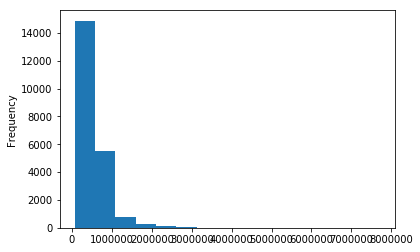

In [17]:
df['price'].plot.hist(bins=15)

In [42]:
# Cargar modelo
model = sm.OLS(y, X).fit()

# Hacer predicciones
predictions = model.predict(X)

# Resumen del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                 1.723e+04
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        16:11:32   Log-Likelihood:            -2.9845e+05
No. Observations:               21613   AIC:                         5.969e+05
Df Residuals:                   21605   BIC:                         5.970e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
bedrooms    -3.994e+04   2222.394    -17.972      0.000   -4.43e+04   -3.56e+04
bathrooms   -1.181e+04   3625.457     -3.256      0.001   -1.89e+04   -4700.133
floors       8870.1870   4098.421      2.164      0.030     836.979    1.69e+04
condition    6.267e+04   2578.226     24.308      0.000    5.76e+04    6.77e+04
sqft_above    -61.1619      4.795    -12.755      0.000     -70.561     -51.763
sqft_living   246.6838      4.912     50.219      0.000     237.056     256.312
yr_built     -445.2320      9.241    -48.181      0.000    -463.345    -427.119
grade        1.235e+05   2375.874     51.987      0.000    1.19e+05    1.28e+05
==============================================================================
Omnibus:                    17075.255   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1102247.779
Skew:                           3.305   Prob(JB):                         0.00
Kurtosis:                      37.355   Cond. No.                     9.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

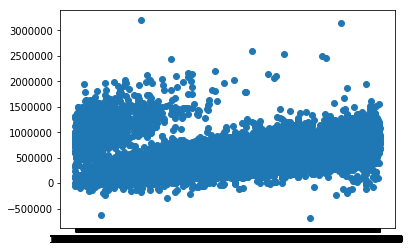

In [33]:
plt.scatter(y, predictions)

In [13]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')